<a href="https://colab.research.google.com/github/HJJJJX/GEO_Practice/blob/main/12-Recurrent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks

Recurrent neural networks are designed to analyze data consisting of ordered sequences of values. They are useful tools for analyzing temporal changes or other types of sequential data.

# Global Surface Temperature

For our first example, we will use the global temperature estimate (GISTEMP) from NASA https://data.giss.nasa.gov/gistemp/

* GISTEMP Team, 2023: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies.
* Lenssen, N., G. Schmidt, J. Hansen, M. Menne, A. Persin, R. Ruedy, and D. Zyss, 2019: [Improvements in the GISTEMP uncertainty model](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2018JD029522). J. Geophys. Res. Atmos., 124, no. 12, 6307-6326, doi:10.1029/2018JD029522.

In [ ]:
import pandas as pd

url = 'https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv'

# read from CSV file into a pandas data frame
# skip first and last row
df = pd.read_csv(url, skiprows=1, skipfooter=1, engine='python')
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-0.14,-0.23,-0.22,-0.17,-0.17,***,***,-0.12,-0.17,-0.20
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-0.07,-0.09,-.10,-.17,0.05,-0.08,-0.18
2,1882,0.16,0.14,0.05,-0.17,-0.15,-0.23,-0.16,-0.07,-0.14,-0.23,-0.16,-0.35,-0.11,-.09,.08,-0.09,-0.16,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.17,-0.08,-0.06,-0.14,-0.21,-0.11,-0.23,-0.11,-0.17,-.19,-.34,-0.16,-0.09,-0.18
4,1884,-0.13,-0.08,-0.36,-0.40,-0.34,-0.35,-0.30,-0.28,-0.27,-0.25,-0.33,-0.31,-0.28,-.27,-.10,-0.36,-0.31,-0.28


In [ ]:
df.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
139,2019,0.94,0.95,1.17,1.02,0.85,0.90,0.94,0.95,0.93,1.00,0.99,1.10,0.98,.96,.94,1.01,0.93,0.97
140,2020,1.17,1.24,1.17,1.13,1.02,0.91,0.89,0.87,0.98,0.88,1.10,0.80,1.01,1.04,1.17,1.11,0.89,0.99
141,2021,0.81,0.64,0.89,0.75,0.79,0.84,0.92,0.82,0.92,0.99,0.94,0.86,0.85,.84,.75,0.81,0.86,0.95
142,2022,0.91,0.89,1.05,0.84,0.84,0.92,0.94,0.95,0.89,0.96,0.73,0.80,0.89,.90,.89,0.91,0.94,0.86
143,2023,0.88,0.98,1.22,1.00,0.93,1.08,1.19,1.20,1.48,1.34,1.43,1.35,1.17,1.13,.89,1.05,1.16,1.41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    144 non-null    int64  
 1   Jan     144 non-null    float64
 2   Feb     144 non-null    float64
 3   Mar     144 non-null    float64
 4   Apr     144 non-null    float64
 5   May     144 non-null    float64
 6   Jun     144 non-null    float64
 7   Jul     144 non-null    float64
 8   Aug     144 non-null    float64
 9   Sep     144 non-null    float64
 10  Oct     144 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     144 non-null    object 
 15  DJF     144 non-null    object 
 16  MAM     144 non-null    float64
 17  JJA     144 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(16), int64(1), object(2)
memory usage: 21.5+ KB


The data table contains temperature anomalies by month for the last 144 years. Plotting the table allows us to visualize how the present day stands out in history.

In [ ]:
months = 'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split()
temp = df[months].to_numpy()

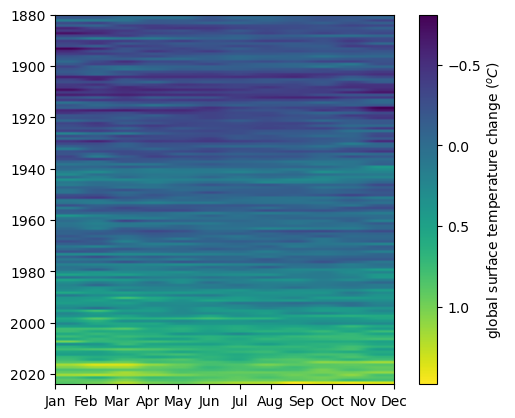

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(temp, aspect=1/12, extent=[0, 11, 2024, 1880])
cb = plt.colorbar()
cb.ax.invert_yaxis()
cb.set_label('global surface temperature change ($^{o}C$)')
plt.xticks(range(12), months)
plt.show()

Let us flatten the data to put the timeline into a one-dimensional array.

In [ ]:
temp1 = temp.flatten()
length = len(temp1)

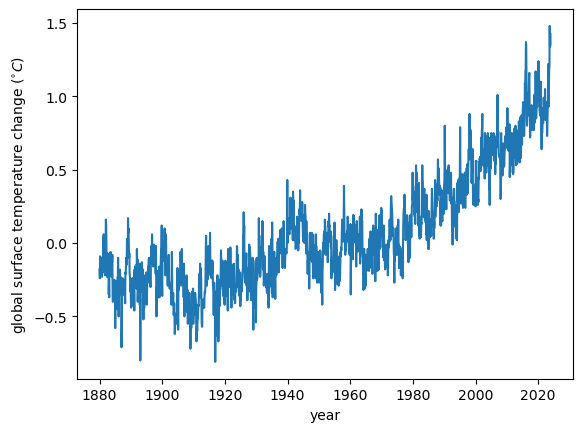

In [ ]:
import numpy as np

xaxis = np.arange(1880, 2024, 1/12)
plt.plot(xaxis, temp1)
plt.xlabel('year')
plt.ylabel('global surface temperature change ($^{\circ}C$)')
plt.show()

We can apply a running mean filter to smooth the data for better visualization.

In [ ]:
def running_mean(x, radius):
    'apply a box filter for smoothing the input'
    cumsum = np.cumsum(np.pad(x, (radius, 0), 'edge'))
    return (cumsum[radius:] - cumsum[:-radius])/radius


# smooth over three years = 36 months
temp_smooth = running_mean(temp1, 36)

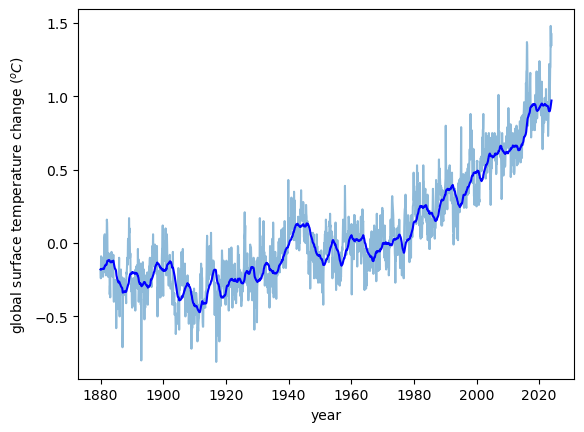

In [ ]:
plt.plot(xaxis, temp1, alpha=0.5)
plt.plot(xaxis, temp_smooth, color='b')
plt.xlabel('year')
plt.ylabel('global surface temperature change ($^{o}C$)')
plt.show()

## Making Predictions

Learning the data pattern implies the ability to make predictions. We will try to learn how to predict global temperature changes using previous values.

To simplify further processing, let us first scale the data to the range from -1 to 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# add a dimension of one
temp2 = np.expand_dims(temp_smooth, 1)
# set the range
scaler = MinMaxScaler((-1, 1)).fit(temp2)
temp_scaled = scaler.transform(temp2)
temp_scaled

array([[-0.59637974],
       [-0.59869054],
       [-0.59522434],
       ...,
       [ 0.96610822],
       [ 0.97881764],
       [ 1.        ]])

Next, we break the data into sliding windows with 121 values in each window. For better training, we randomly shuffle the windows.

In [ ]:
import random

time = 120  # 10 years

x = []
for n in range(time, length):
    x.append(temp_scaled[n-time:n+1, :])

random.seed(2024)
random.shuffle(x)
x = np.array(x)
x.shape

(1608, 121, 1)

We are going to train our machine-learning model to predict the 121st value from the previous 120 values, representing 10 years of global temperature measurements.

In [ ]:
X = x[:, :time, :]
y = x[:, time, :]

X.shape, y.shape

((1608, 120, 1), (1608, 1))

In [ ]:
from tensorflow.keras.utils import set_random_seed

# for reproducibility
set_random_seed(2024)
np.random.seed(2024)

Our first attempt of a predictive model will be a fully-connected neural network with one hidden layer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

fmodel = Sequential()
fmodel.add(Input((time,)))
fmodel.add(Dense(5, activation='tanh'))
fmodel.add(Dense(1))
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 605       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In the hidden layer, the corresponding equation is

$\mathbf{h} = t\left(\mathbf{A}^T\,\mathbf{x}+\mathbf{b}\right)\;,$

where $t$ stands for the hyperbolic tangent function $\tanh$, $\mathbf{A}$ is a $120 \times 5$ matrix, and $\mathbf{b}$ is a vector of size 5.

In the output layer, the equation is

$y = \mathbf{a}^T\,\mathbf{h} + b\;,$

with the scalar intercept $b$ and the slope $\mathbf{a}$ as a vector of size 5.

Altogether, the model has $120 \times 5 + 5 + 5 + 1 = 611$ parameters.

In [ ]:
epochs = 25

fmodel.compile(optimizer='adam', loss='mse')
fit = fmodel.fit(X, y, epochs=epochs, batch_size=12, validation_split=0.1)

Epoch 1/25
  1/121 [..............................] - ETA: 14s - loss: 0.4324

2024-04-17 22:41:51.438406: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


121/121 [==============================] - 0s 751us/step - loss: 0.0345 - val_loss: 0.0055
Epoch 2/25
121/121 [==============================] - 0s 335us/step - loss: 0.0045 - val_loss: 0.0028
Epoch 3/25
121/121 [==============================] - 0s 327us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 4/25
121/121 [==============================] - 0s 337us/step - loss: 0.0022 - val_loss: 0.0015
Epoch 5/25
121/121 [==============================] - 0s 318us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 6/25
121/121 [==============================] - 0s 331us/step - loss: 0.0015 - val_loss: 0.0011
Epoch 7/25
121/121 [==============================] - 0s 345us/step - loss: 0.0015 - val_loss: 9.4918e-04
Epoch 8/25
121/121 [==============================] - 0s 360us/step - loss: 0.0012 - val_loss: 8.9383e-04
Epoch 9/25
121/121 [==============================] - 0s 347us/step - loss: 0.0014 - val_loss: 9.9710e-04
Epoch 10/25
121/121 [==============================] - 0s 335us/step - loss: 0.00

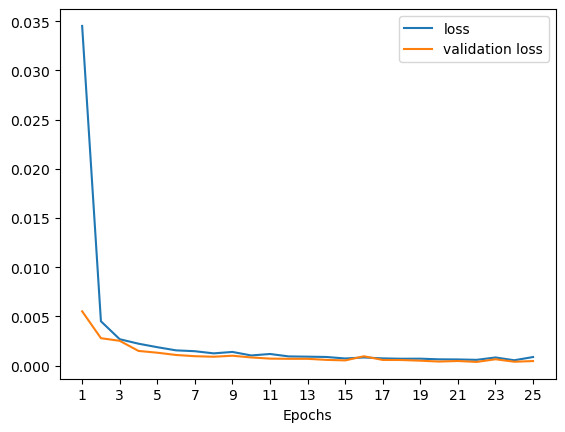

In [ ]:
def plot_loss(fit, epochs):
    iterations = np.arange(1, epochs+1)
    plt.plot(iterations, fit.history['loss'], label='loss')
    plt.plot(iterations, fit.history['val_loss'], label='validation loss')
    plt.legend()
    plt.xticks(iterations[::epochs//10])
    plt.xlabel('Epochs')
    plt.show()


plot_loss(fit, epochs)

The model works well, but it is not optimal because it fails to consider the data's sequential nature. Let us see if we can improve performance using a recurrent neural network.

## Simple RNN

We will first try a classic formulation of a recurrent neural network, implemented in Keras as <code>simpleRNN</code>.

In [ ]:
from tensorflow.keras.layers import SimpleRNN

rmodel = Sequential()
rmodel.add(SimpleRNN(24, input_shape=(time, 1)))
rmodel.add(Dense(1))
rmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24)                624       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


The <tt>simpleRNN</tt> layer is based on the following equation:

$\mathbf{h}_n = t\left(\mathbf{A}^T\,\mathbf{h}_{n-1}  + \mathbf{b} + \mathbf{c}^T\,x_n\right)\;,$

where $\mathbf{A}$ is a $24 \times 24$ matrix, and $\mathbf{b}$ is a column-vector of size 24, and $\mathbf{c}$ is a row-vector of size 24. The sequence of hidden state vectors $\mathbf{h}_n$ is initialized with a zero vector. The model represents a recursive computation that tries to capture the sequential pattern.

The output layer is analogous to the previous case:

$x_{N+1} = \mathbf{a}^T\,\mathbf{h}_N + b\;,$

Altogether, the model has $24 \times 24 + 24 + 24 + 24 + 1 = 649$ parameters.

Note that the number of parameters does not depend on the data size.

In [ ]:
24*24+24*3+1

649

In [ ]:
epochs = 25

rmodel.compile(optimizer='adam', loss='mse')
fit = rmodel.fit(X, y, epochs=epochs, batch_size=12, validation_split=0.1)

Epoch 1/25
121/121 [==============================] - 1s 4ms/step - loss: 0.0144 - val_loss: 9.6616e-04
Epoch 2/25
121/121 [==============================] - 0s 4ms/step - loss: 8.1029e-04 - val_loss: 5.4104e-04
Epoch 3/25
121/121 [==============================] - 0s 4ms/step - loss: 5.0024e-04 - val_loss: 3.7657e-04
Epoch 4/25
121/121 [==============================] - 0s 4ms/step - loss: 3.8566e-04 - val_loss: 3.1595e-04
Epoch 5/25
121/121 [==============================] - 0s 4ms/step - loss: 3.2189e-04 - val_loss: 2.6731e-04
Epoch 6/25
121/121 [==============================] - 0s 4ms/step - loss: 2.7362e-04 - val_loss: 2.6631e-04
Epoch 7/25
121/121 [==============================] - 0s 4ms/step - loss: 2.4133e-04 - val_loss: 2.0184e-04
Epoch 8/25
121/121 [==============================] - 0s 4ms/step - loss: 2.1334e-04 - val_loss: 1.8463e-04
Epoch 9/25
121/121 [==============================] - 0s 4ms/step - loss: 1.8639e-04 - val_loss: 1.6500e-04
Epoch 10/25
121/121 [===========

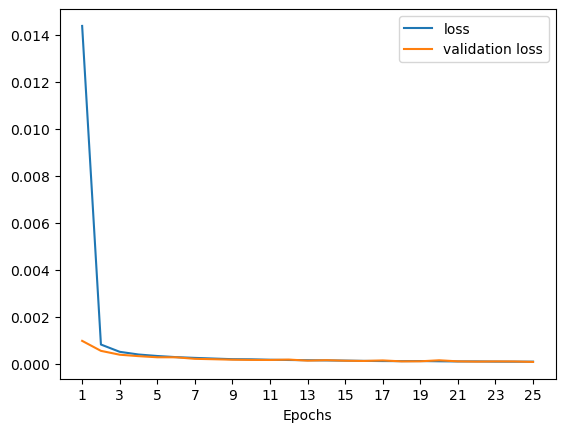

In [ ]:
plot_loss(fit, epochs)

The model's convergence has improved but can be enhanced further with a more robust method.

## <div style="color:red">Task 1</div>

Let us take a look inside the black box. We can extract the model weights and examine them.

In [ ]:
# weights from the SimpleRNN layer
c, A, b = rmodel.layers[0].get_weights()
A.shape, b.shape, c.shape

((24, 24), (24,), (1, 24))

Plot the weights $\mathbf{A}$, $\mathbf{b}$, and $\mathbf{c}$ and try to see if they have any recognizable patterns.

## LSTM

LSTM stands for Long Short-Term Memory. It is a famous network design focused on capturing both immediate (short-term) dependencies, as in <code>SimpleRNN</code>, and longer-term trends.

* Hochreiter, S. and Schmidhuber, J., 1997. [Long short-term memory](https://ieeexplore.ieee.org/abstract/document/6795963). Neural computation, 9(8), pp.1735-1780.

Its application is similar.

In [ ]:
from tensorflow.keras.layers import LSTM

lmodel = Sequential()
lmodel.add(LSTM(12, input_shape=(time, 1)))
lmodel.add(Dense(1))
lmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12)                672       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


2024-04-17 22:42:04.633251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-17 22:42:04.633860: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-17 22:42:04.634345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*yo6sBAs6NUtNI0a16ZqZKQ.png)



If <code>SimpleRNN</code> maintains only one sequence of hidden-state vectors $\mathbf{h}_n$, LSTM tracks two sequences for short memory and long memory. Its action can be expressed with a sequence of equations or a diagram.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Zrht4QBK5_hAxif17ED4ew.png)

https://towardsdatascience.com/lstm-recurrent-neural-networks-how-to-teach-a-network-to-remember-the-past-55e54c2ff22e

In [ ]:
epochs = 30

lmodel.compile(optimizer='adam', loss='mse')
fit = lmodel.fit(X, y, epochs=epochs, batch_size=12, validation_split=0.1)

Epoch 1/30


2024-04-17 22:42:04.742173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-17 22:42:04.742980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-17 22:42:04.743482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

121/121 [==============================] - 2s 10ms/step - loss: 0.0946 - val_loss: 0.0038
Epoch 2/30
 13/121 [==>...........................] - ETA: 0s - loss: 0.0041

2024-04-17 22:42:06.315491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-17 22:42:06.316051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-17 22:42:06.316459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

121/121 [==============================] - 1s 9ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 3/30
121/121 [==============================] - 1s 8ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 4/30
121/121 [==============================] - 1s 9ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 5/30
121/121 [==============================] - 1s 8ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/30
121/121 [==============================] - 1s 8ms/step - loss: 0.0012 - val_loss: 9.9495e-04
Epoch 7/30
121/121 [==============================] - 1s 8ms/step - loss: 9.6983e-04 - val_loss: 8.9113e-04
Epoch 8/30
121/121 [==============================] - 1s 11ms/step - loss: 8.3072e-04 - val_loss: 8.2800e-04
Epoch 9/30
121/121 [==============================] - 1s 9ms/step - loss: 7.1971e-04 - val_loss: 7.2663e-04
Epoch 10/30
121/121 [==============================] - 1s 10ms/step - loss: 6.5076e-04 - val_loss: 6.2332e-04
Epoch 11/30
121/121 [==============================] - 1s 9ms/step - los

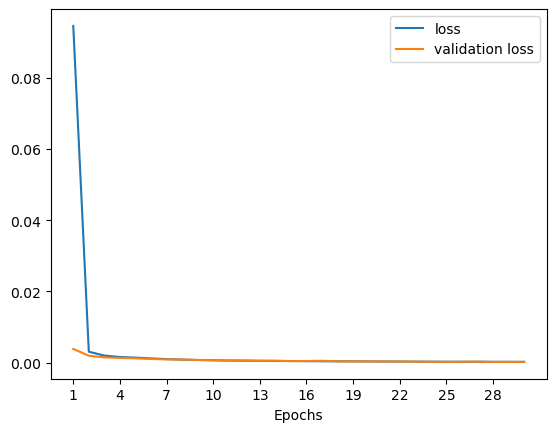

In [ ]:
plot_loss(fit, epochs)

## Testing Model

First, we can test how well the model predicts existing data.

In [ ]:
# select overlapping 10-year windows
x = []
for n in range(time, length):
    x.append(temp_scaled[n-time:n, :])
x = np.array(x)

# make a prediction and unscale it
yp = scaler.inverse_transform(lmodel.predict(x))

51/51 [==============================] - 0s 2ms/step


2024-04-17 22:42:36.988004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-17 22:42:36.988719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-17 22:42:36.989162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

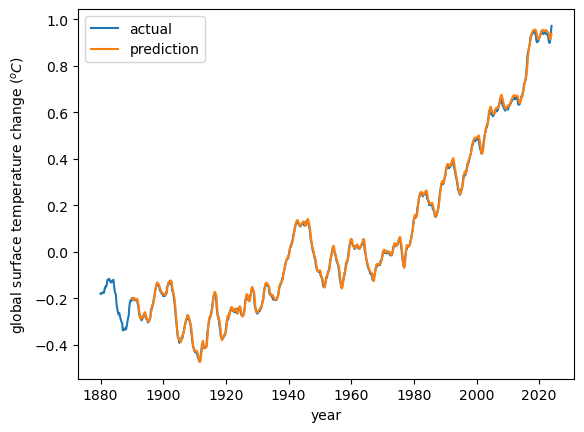

In [ ]:
plt.plot(xaxis, temp_smooth, label='actual')
plt.plot(np.arange(1890, 2024, 1/12), yp, label='prediction')
plt.legend()
plt.xlabel('year')
plt.ylabel('global surface temperature change ($^{o}C$)')
plt.show()

In a more challenging test, let us use ten years of observations before 2016 (the time of the Paris Climate Accords) to predict global temperature changes in the future.

In [ ]:
first = (2016-1880)*12
temp_last = temp_scaled[first-time:first, :]
preds = []
for n in range(first, length):
    # make prediction
    pred = lmodel.predict(np.expand_dims(temp_last, 0), verbose=0)
    # append it to the sliding window
    temp_last = np.append(temp_last[1:, :], pred, axis=0)
    # save it in an array
    preds.append(pred[0])
# unscale the predictions
preds = scaler.inverse_transform(np.array(preds))

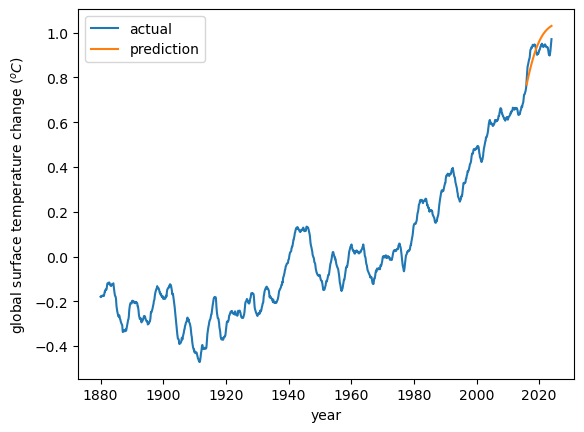

In [ ]:
plt.plot(xaxis, temp_smooth, label='actual')
plt.plot(np.arange(2016, 2024, 1/12), preds, label='prediction')
plt.legend()
plt.xlabel('year')
plt.ylabel('global surface temperature change ($^{o}C$)')
plt.show()

We can see that our model overestimated the actual temperature increase.

### Detrending

Our model assumes a stationary behavior inconsistent with the temperature data. To make the data more stationary, we can remove the overall trend by using linear regression with nonlinear terms.

In [ ]:
from sklearn.linear_model import LinearRegression

# year and year squared
xx2 = np.stack((xaxis, xaxis**2)).transpose()

# fitting a parabola
LR = LinearRegression().fit(xx2, temp1)

# extracting a parabolic trend
trend = LR.predict(xx2)

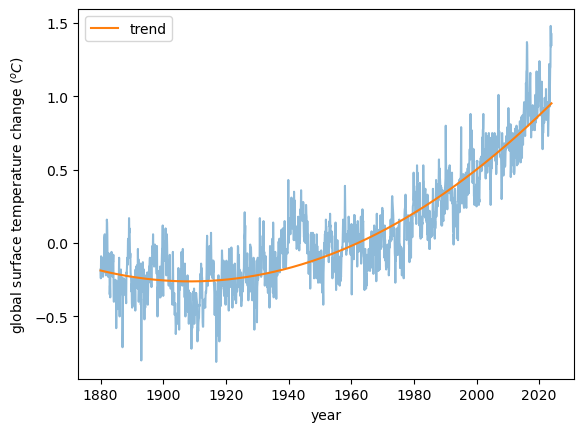

In [ ]:
plt.plot(xaxis, temp1, alpha=0.5)
plt.plot(xaxis, trend, label='trend')
plt.xlabel('year')
plt.ylabel('global surface temperature change ($^{o}C$)')
plt.legend()
plt.show()

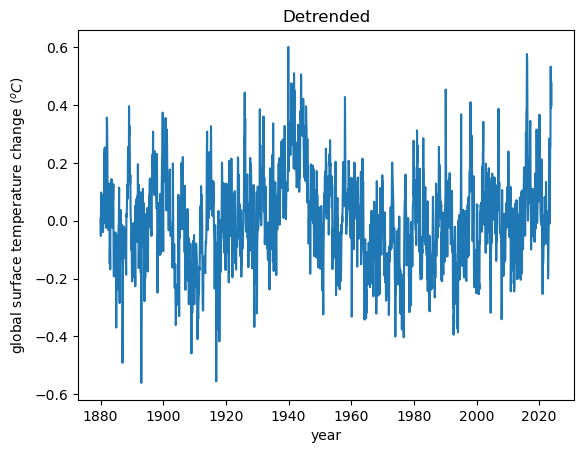

In [ ]:
detrend = temp1 - trend

plt.plot(xaxis, detrend)
plt.xlabel('year')
plt.ylabel('global surface temperature change ($^{o}C$)')
plt.title('Detrended')
plt.show()

## <div style="color:red">Task 2</div>

Repeat the analysis (starting with smoothing) for the data with the removed trend and see if the patterns become more predictable.

### Extending the model

We can also try to improve the model by making it deeper.

A deep model can not only add RNN layers but also use the ability to output whole sequences from the latent space.

In [ ]:
lmodel2 = Sequential()
lmodel2.add(LSTM(12, return_sequences=True, input_shape=(time, 1)))
lmodel2.add(LSTM(12, return_sequences=False))
lmodel2.add(Dense(1))
lmodel2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 120, 12)           672       
                                                                 
 lstm_2 (LSTM)               (None, 12)                1200      
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,885
Trainable params: 1,885
Non-trainable params: 0
_________________________________________________________________


2024-04-17 22:42:39.274156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-17 22:42:39.274701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-17 22:42:39.276157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

The first LSTM layer of the new network has the same configuration as before, but instead of outputting the final value of $\mathbf{h}_N$, it outputs the whole sequence $\mathbf{h}_1, \mathbf{h}_2 \ldots , \mathbf{h}_N$ to use it as an input to the next layer.

## <div style="color:red">Bonus Task</div>

Test if making the model deeper improves its performance. Adjust the parameters if necessary.

## Transformers

LSTM extends the power of prediction by looking at a longer context. However, the context remains limited. A radical departure from localized contexts is the idea of *transformers*, which revolutionized language analysis. Transformers absorb a wider context using the so-called *attention* mechanism.

![](https://sebastianraschka.com/images/blog/2023/self-attention-from-scratch/paper.png)

Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A.N., Kaiser, Ł. and Polosukhin, I., 2017. [Attention is all you need](https://proceedings.neurips.cc/paper_files/paper/2017/hash/3f5ee243547dee91fbd053c1c4a845aa-Abstract.html). Advances in neural information processing systems, 30.

Mathematically, attention is expressed with a simple formula

$\text{Attention}(Q, K, V) = \displaystyle \text{softmax}\left(\frac{QK^\mathrm{T}}{\sqrt{d_k}}\right)V\;,$

where $Q$, $K$, and $V$ (commonly known as *query*, *key*, and *value*) are matrices obtained by multiplying the input data by three weights ($W_Q$, $W_K$, and $W_V$), and $d_k$ corresponds to the dimension.

The illustrations below are borrowed from Jay Allamar: https://jalammar.github.io/illustrated-transformer/

### Step 1: Generating $Q$, $K$, and $V$

![](https://jalammar.github.io/images/t/transformer_self_attention_vectors.png)

### Step 2: Product of Q and K

![](https://jalammar.github.io/images/t/transformer_self_attention_score.png)

### Step 3: Normalization and softmax

![](https://jalammar.github.io/images/t/self-attention_softmax.png)

### Step 4: Multiplication by V

![](https://jalammar.github.io/images/t/self-attention-output.png)

### Alltogether in a matrix form

![](https://jalammar.github.io/images/t/self-attention-matrix-calculation-2.png)